In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as line

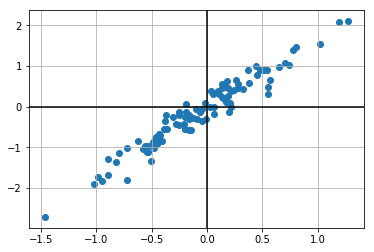

In [2]:
C = np.array([[1,0],[0,0.1]])
R = np.array([[np.cos(np.pi/3),-np.sin(np.pi/3)],[np.sin(np.pi/3),np.cos(np.pi/3)]])
X = R.dot(C.dot(np.random.randn(2,100)))


fig,ax = plt.subplots()
ax.axvline(x=0,color='k')
ax.axhline(y=0,color='k')
plt.grid(True)
plt.scatter(X[0],X[1])



Consider the points scattered as above. From the figure it is clear that the data has a direction. This lecture is find the direction of the data. Another way of looking at it is to find a direction which best represents the data. That is, if you extend the unit vector representing the direction the distance of the data vectors from the extended vector will be minimum. This scenario is depicted in the figure below:

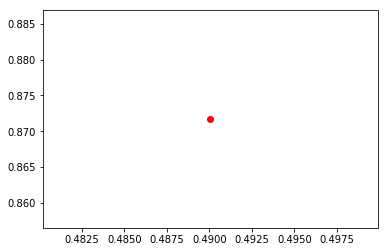

In [6]:
u,s,v = np.linalg.svd(X)
l = line([0,-u[0,0]],[0,-u[0,1]],color='m')
ax.add_line(l)
plt.scatter(-u[0,0],-u[1,0],color='r')
plt.show()


Both interpreteations will lead to the solution as the ensuing discussion shows. Let us start with the first interpretation. 

We want to find the direction of maximum variance. For that let us take a unit vector $p$ and project the data onto the vector. The vector $p$ along which the projections vary most will be the direction of maximum variance. (And projection of a vector $x$ on a unit vector $u$ is given by $x^Tp$. Assume the $x$ is a zero mean random variable. That is, $Ex=0$. 
Therefore $Ex^Tp = 0$ as well. 

Hence variance of the projections is given by $E\{(x^Tp)^2\}$. Now $(x^Tp)^2 = p^Txx^Tp$. This way of writing the expression lets us write variance of projection in terms of the covariance matrix of $x$. The covariance matrix of $x$ is defined as : $C = Exx^T$. Variance of the projections therefore can be written as : $E\{(x^Tp)^2\} = p^TExx^Tp = p^TCp$. Therefore finding the direction of maximum variance is obtained by solving :
             \begin{equation}
                \min_p -p^TCp
             \end{equation}
subject to :
            \begin{equation}
               \lVert p \rVert^2 = 1
            \end{equation}
(The constraint is because we are looking for the directions and hence we need only unit vectors)

Now take the Lagrangean and differentiate it wrt $p$ and set it to $0$. This yields : $Cp = \lambda p$, ($\lambda$ is the lagrangean multiplier). We need to maximize $p^TCp = \lambda$. Hence we define $p$ to be the eigen vector corresponding to the largest eigen value \lambda_1 of $C$. 

Computationally this is done using singular value decomposition of the matrix $X=[x_1,x_2,\cdots x_n]$.(***Please google for Singular Value Decomposition***)

Now we will go to the best representative interpretation. For a data vector $x$ the representation wrt $p$ is given by $(x^Tp) p$. Therefore the expected error on representing the $x$ with $p$ is given by $ mse = E\lVert x - (x^Tp)p \rVert^2 = E\{\lVert x \rVert^2 + (x^Tp)^2 \lVert p \rVert^2 - (x^Tp)^2 \} = E\lVert x \rVert^2 - p^TCp $

Therefore minimizing error leads to the optimization problem below:
        \begin{equation}
         \min_p   -p^TCp
       \end{equation}
subject to :
            \begin{equation}
               \lVert p \rVert^2 = 1
            \end{equation}

Note that this is same as the formulation for the previous interpretation.

Now the solution $p$ obtained is called the **First Principal Component**.hence forth we will refer to it as $p_1$ to show that it is the First PC. 

Now we have found a vector which represents the data well (but not fully). Representation with respect to the first Principal Component leads a residue: $r = x - (x^Tp)p $. If we want to reduce the error further, we will compute a direction which represents the residue well. This is easy considering the discussion so far. We will find the First Principal Component of the residue. Now the covariance matrix of $r$ is given by $C_1 = Err^T$. The reader may refer to the lecture notes to see that $C_1 = C - \lambda_1 pp^T$. This means that the largest eigen value $\lambda_2$ of $C_1$ is the second largest eigen value of $C$. Using the same arguments as above we can see that the third principal component is the eigen vector of $C$ corresponding to the third largest eigen value.


We can iteratively find the third principal component by taking the residue $r = x - (x^Tp_1)p_1 - (x^Tp_2)p_2$. 


We can therefore repeat the process $k$ times where $k$ is the rank of $C$.



In [4]:
X = X - X.mean(axis=1)[:,np.newaxis]# subtract mean from the data to make it zero mean(centering the data)
C = np.dot(X,X.T)/X.shape[1] #covariance matrix of X
E,P = np.linalg.eig(C)
p1 = P[:, np.argmax(E)]#take the eigen vector correspnding to the largest eigen vector.


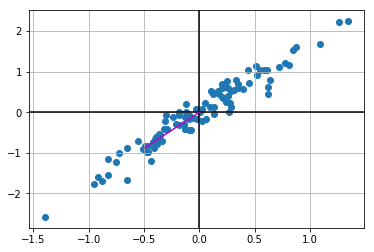

In [5]:
fig,ax = plt.subplots()
ax.axvline(x=0,color='k')
ax.axhline(y=0,color='k')
plt.grid(True)
plt.scatter(X[0],X[1])

#plotting the first principal component direction.
l = line([0,p1[0]],[0,p1[1]],color='m')
ax.add_line(l)
#plt.scatter(-u[0,0],-u[1,0],color='r')
plt.show()

## Dimensionality Reduction
Starting from the first principal component $p_1$ we can go on finding PCs till the residue becomes small in magnitude. 
Now expected magnitude of the residue of the first $j$ PCs is given by $E\lVert x - \sum_{i=1}^{j} (x^p_i) p_i \rVert^2$ .
The reader is advised to prove that the error is equal to $\sum_{i=j+1}^{k} \lambda_i $. 

Therefore if the eigen values are sufficiently small then the representation is fairly accurate. This reduces the dimensionality of the data, since you will be using the first few eigen vectoras of $C$ only to represent the data vector. For instance, the data can be say 100 dimensional, but the $C$ may have only the first $5$ eigen values to be of significant magnitude. In this case you need to use only the first $5$ PCs to represent the data. The dimension of the data gets reduced to 5. 


## Use the pima indian diabetes data set to compute the PCs. Plot the error magnitude with incresing number of PCs in the representation.